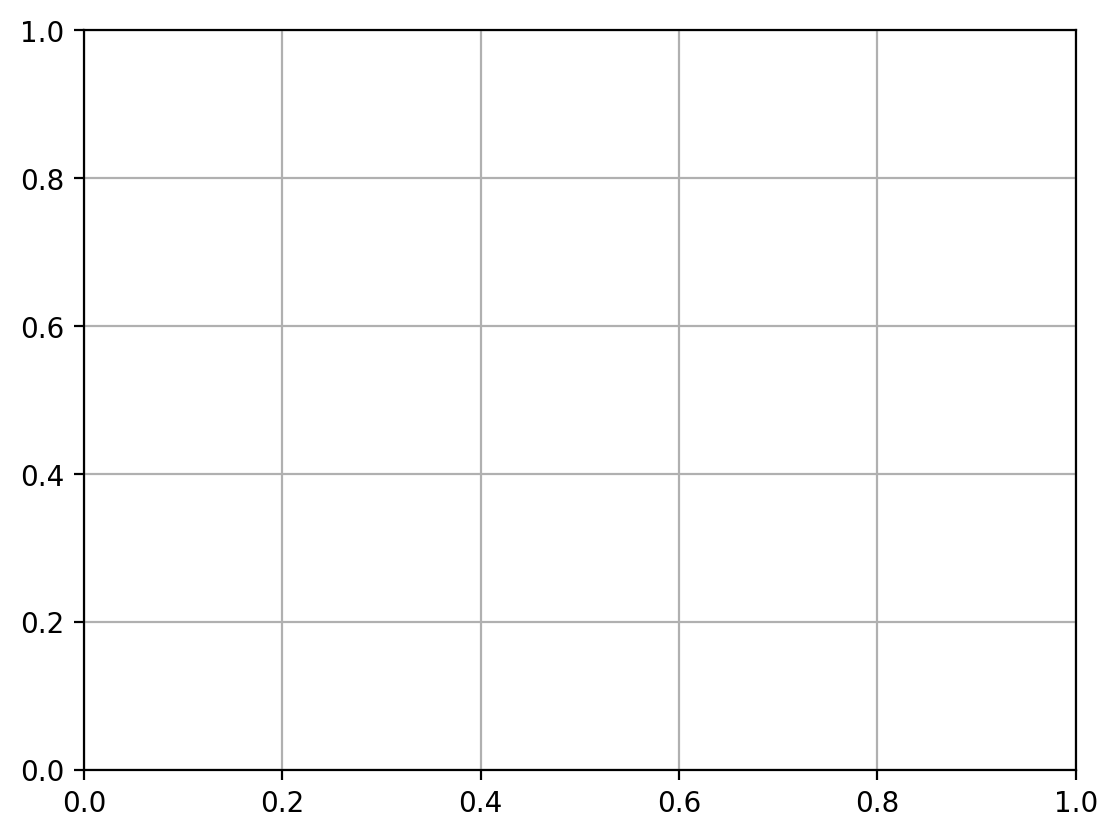

In [35]:
"""Imports"""
from calendar import month
from ctypes import c_ulong
import pandas as pd
import numpy as np
import re
import chainladder as cl
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import ipywidgets as widgets
from dateutil import relativedelta as rd
import datetime
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
import sqlite3
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')
plt.grid(None)
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import r2_score



In [36]:
# Ruta de la base

df = pd.read_excel('Input Database_Unified.xlsx',sheet_name='Payments')
df


,check_number,claim_occurrence_span_start,check_date,check_amount_total,company_code,block_code,PLOB,LOB,State
0,1000163213,2019-01-03,2019-01-20,176.86,NaN,NaN,NaN,NaN,NaN
1,1000163182,2019-01-06,2019-01-20,84.95,NaN,NaN,NaN,NaN,NaN
2,1000163252,2019-01-10,2019-01-22,73.81,NaN,NaN,NaN,NaN,NaN
3,1000163387,2019-01-03,2019-01-27,19.40,NaN,NaN,NaN,NaN,NaN
4,1000163482,2019-01-08,2019-01-29,177.24,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18381,DUMMY,2024-02-01,2024-02-01,0.00,NaN,NaN,NaN,NaN,NaN
18382,1000188311,2024-01-30,2024-03-17,8.73,NaN,NaN,NaN,NaN,NaN
18383,1000188310,2024-02-01,2024-03-17,14065.00,NaN,NaN,NaN,NaN,NaN
18384,1000188313,2023-11-26,2024-03-28,1600.00,NaN,NaN,NaN,NaN,NaN


In [24]:
#Inputs in FrontEnd
InputOrigin='claim_occurrence_span_start'
InputDevelopment='check_date'
InputColumns='check_amount_total'
InputCumulative=False
#InputCompany="company_code"
#InputBlock="block_code"
#InputPLOB="PLOB"
#InputLOB="LOB"
#InputState="State"

we = cl.Triangle(
    df,
    origin=InputOrigin,
    development=InputDevelopment,
    columns=InputColumns,
    #index=[InputCompany,InputBlock,InputPLOB, InputLOB, InputState],
    cumulative=InputCumulative
)
we


,1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,58,59,60,61,62,63
2019-01,"6,171","24,270","7,079","1,809","19,181","5,379","1,385",532,66,106,...,,,,,,,,,,
2019-02,"1,832","19,463","10,014","16,281","1,583","1,393","1,372",97,,12,...,,,,,,,,,,
2019-03,"3,851","21,533","16,630","4,987",92,301,"1,403",79,16,32,...,,,,,,,,,,
2019-04,"2,031","14,921","14,958","4,012",201,540,74,24,70,,...,,,,,,,,,,
2019-05,"2,124","25,302","6,514","2,529",202,"1,613","1,416",207,35,10,...,,,,,,,,,,
2019-06,"4,619","31,841","2,368","2,498","1,683","1,423",9,62,,2,...,,,,,,,,,,
2019-07,"2,955","19,689","7,362",624,"4,155",75,"1,263",2,"1,382",25,...,,,,,,,,,,
2019-08,"2,212","14,020","9,425","1,611",196,"1,468",98,"1,401",59,,...,,,,,,,,,,
2019-09,"2,019","18,474","5,952","1,527",240,125,"1,496",28,,"1,425",...,,,,,,,,,,
2019-10,"1,678","13,810","7,687","1,930",513,"2,619",71,"1,500",40,"4,278",...,,,,,,,,,,


In [37]:
"""separating the triangles - Input that will depend on the triangle we'd like to create"""
#Company="company_code"
#Block="block_code"
#PLOB="PLOB"
#LOB="LOB"
#State="State"


"""generic"""
#triangle_paid= we.loc[Company, Block,PLOB, LOB, State]

# Calculating incurred triangle - if we have case reserve data data
#incurred = caseReserve+ paid

"""claim counts"""
#triangle_closed=we.loc[Company, Block,PLOB, LOB, State]

"""severity"""
#triangle_severity_paid=triangle_paid/triangle_closed

"""set the cumulative triangle"""
ValuationDate= datetime.date(2024,3,1)
InitialDate= f'{ValuationDate.year-2}-{ValuationDate.month}-{ValuationDate.day}'

triangle=we[we.origin>InitialDate][we.development<25]
triangle_cum=triangle.incr_to_cum()
triangle_cum


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2022-04,248,"4,455","17,732","17,754","17,878","17,877","17,877","17,877","17,877","17,877",...,"17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902"
2022-05,692,"20,336","24,736","24,955","26,595","26,595","26,595","28,540","28,540","30,096",...,"30,096","30,096","30,096","30,096","30,096","30,096","30,096","30,096","30,096",
2022-06,"1,073","7,433","13,657","17,405","16,888","16,888","16,888","17,472","17,566","17,568",...,"22,434","22,434","22,434","22,434","22,434","22,434","22,434","22,434",,
2022-07,475,"19,308","21,797","22,256","24,093","24,093","31,117","31,197","31,227","36,677",...,"36,677","36,677","36,677","36,677","36,677","36,677","36,677",,,
2022-08,"1,702","9,761","12,143","14,200","16,110","16,583","16,597","27,898","29,461","35,169",...,"35,169","35,169","35,169","35,169","35,169","35,169",,,,
2022-09,"1,234","10,643","13,448","13,630","14,443","17,968","23,097","29,081","31,466","31,466",...,"31,633","31,633","31,633","31,633","31,633",,,,,
2022-10,595,"4,686","6,969","8,727","8,856","13,590","19,619","19,619","19,619","20,008",...,"20,010","20,010","20,010","20,010",,,,,,
2022-11,833,"4,557","7,504","10,688","13,469","15,414","15,414","15,414","15,427","15,530",...,"15,557","15,557","15,557",,,,,,,
2022-12,,"4,191","7,271","9,166","9,346","9,498","9,808","9,849","9,850","9,850",...,"9,851","9,851",,,,,,,,
2023-01,629,"20,021","24,044","25,901","30,568","32,243","32,277","32,277","32,292","32,292",...,"32,299",,,,,,,,,


<Axes: title={'center': 'Triangle Cumulative'}>

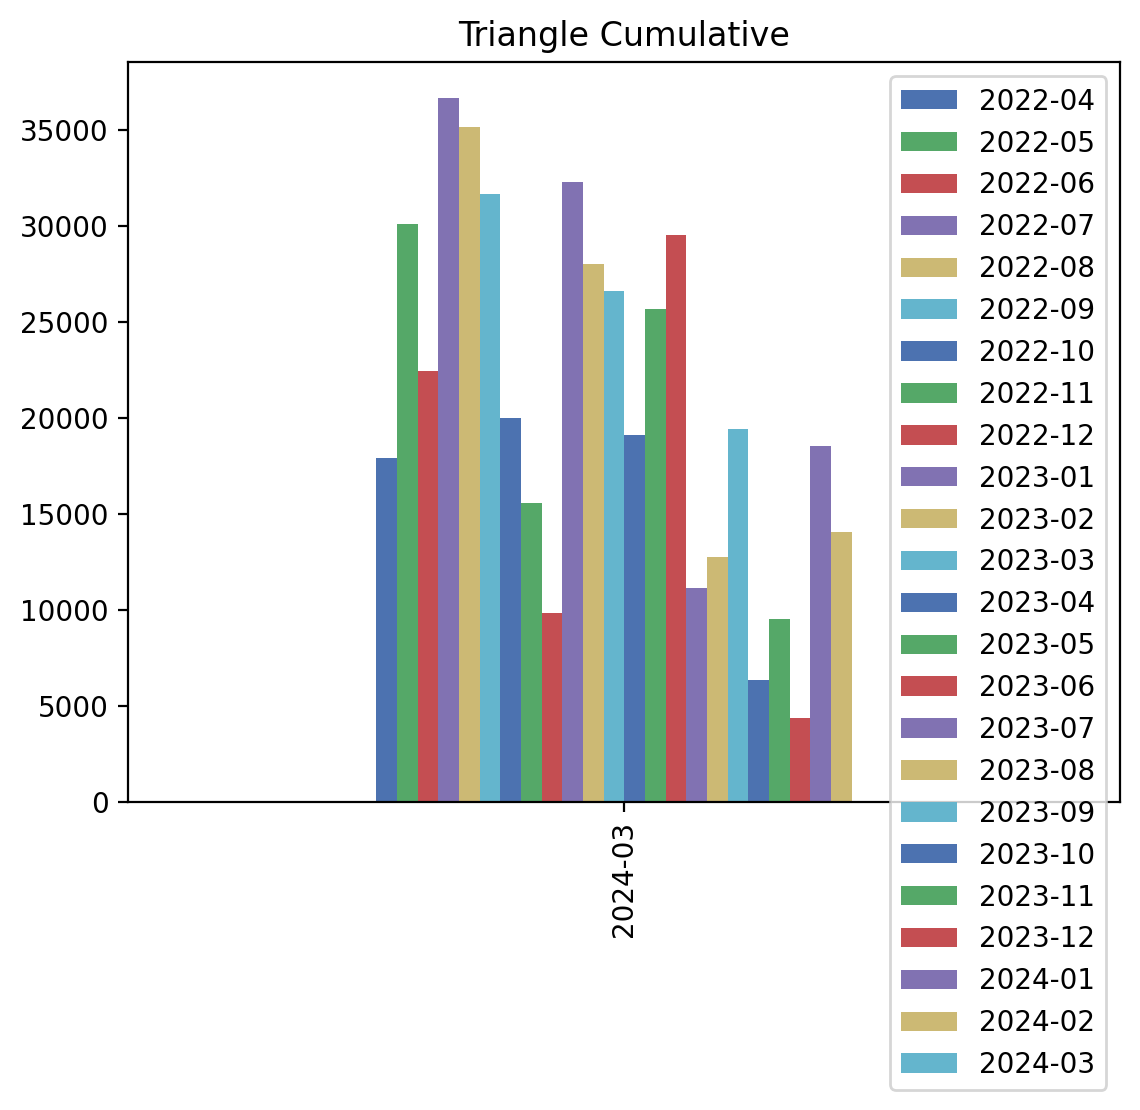

In [6]:
"""Triangle Plot"""""
triangle_cum.latest_diagonal.T.plot(kind='bar',
title="Triangle Cumulative")

In [7]:
"""Dev to Calendar-Generic"""
triangle_cum.dev_to_val()

,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
2022-04,248,"4,455","17,732","17,754","17,878","17,877","17,877","17,877","17,877","17,877",...,"17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902"
2022-05,,692,"20,336","24,736","24,955","26,595","26,595","26,595","28,540","28,540",...,"30,096","30,096","30,096","30,096","30,096","30,096","30,096","30,096","30,096","30,096"
2022-06,,,"1,073","7,433","13,657","17,405","16,888","16,888","16,888","17,472",...,"22,434","22,434","22,434","22,434","22,434","22,434","22,434","22,434","22,434","22,434"
2022-07,,,,475,"19,308","21,797","22,256","24,093","24,093","31,117",...,"36,677","36,677","36,677","36,677","36,677","36,677","36,677","36,677","36,677","36,677"
2022-08,,,,,"1,702","9,761","12,143","14,200","16,110","16,583",...,"35,169","35,169","35,169","35,169","35,169","35,169","35,169","35,169","35,169","35,169"
2022-09,,,,,,"1,234","10,643","13,448","13,630","14,443",...,"31,466","31,466","31,633","31,633","31,633","31,633","31,633","31,633","31,633","31,633"
2022-10,,,,,,,595,"4,686","6,969","8,727",...,"19,619","20,008","20,008","20,008","20,010","20,010","20,010","20,010","20,010","20,010"
2022-11,,,,,,,,833,"4,557","7,504",...,"15,414","15,427","15,530","15,530","15,530","15,530","15,530","15,557","15,557","15,557"
2022-12,,,,,,,,,,"4,191",...,"9,808","9,849","9,850","9,850","9,850","9,850","9,850","9,851","9,851","9,851"
2023-01,,,,,,,,,,629,...,"32,243","32,277","32,277","32,292","32,292","32,299","32,299","32,299","32,299","32,299"


In [8]:
"""Cum to Incr Generic"""
triangle_cum.cum_to_incr()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2022-04,248,"4,207","13,277",21,124,-1,,,,,...,,,,,,,,,,
2022-05,692,"19,644","4,400",220,"1,639",,,"1,945",,"1,556",...,,,,,,,,,,
2022-06,"1,073","6,360","6,223","3,748",-517,,,584,95,2,...,,,,,,,,,,
2022-07,475,"18,833","2,490",458,"1,838",,"7,024",80,30,"5,450",...,,,,,,,,,,
2022-08,"1,702","8,059","2,382","2,056","1,910",473,14,"11,301","1,563","5,708",...,,,,,,,,,,
2022-09,"1,234","9,409","2,805",182,812,"3,526","5,129","5,983","2,385",,...,,,,,,,,,,
2022-10,595,"4,091","2,283","1,757",129,"4,734","6,030",,,389,...,,,,,,,,,,
2022-11,833,"3,724","2,947","3,183","2,781","1,945",,,14,102,...,28,,,,,,,,,
2022-12,,"4,191","3,080","1,895",180,152,310,41,1,,...,,,,,,,,,,
2023-01,629,"19,392","4,022","1,858","4,666","1,675",34,,15,,...,,,,,,,,,,


In [9]:
"""Incr to Cum - Generic"""
triangle_cum.incr_to_cum()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
2022-04,248,"4,455","17,732","17,754","17,878","17,877","17,877","17,877","17,877","17,877",...,"17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902","17,902"
2022-05,692,"20,336","24,736","24,955","26,595","26,595","26,595","28,540","28,540","30,096",...,"30,096","30,096","30,096","30,096","30,096","30,096","30,096","30,096","30,096",
2022-06,"1,073","7,433","13,657","17,405","16,888","16,888","16,888","17,472","17,566","17,568",...,"22,434","22,434","22,434","22,434","22,434","22,434","22,434","22,434",,
2022-07,475,"19,308","21,797","22,256","24,093","24,093","31,117","31,197","31,227","36,677",...,"36,677","36,677","36,677","36,677","36,677","36,677","36,677",,,
2022-08,"1,702","9,761","12,143","14,200","16,110","16,583","16,597","27,898","29,461","35,169",...,"35,169","35,169","35,169","35,169","35,169","35,169",,,,
2022-09,"1,234","10,643","13,448","13,630","14,443","17,968","23,097","29,081","31,466","31,466",...,"31,633","31,633","31,633","31,633","31,633",,,,,
2022-10,595,"4,686","6,969","8,727","8,856","13,590","19,619","19,619","19,619","20,008",...,"20,010","20,010","20,010","20,010",,,,,,
2022-11,833,"4,557","7,504","10,688","13,469","15,414","15,414","15,414","15,427","15,530",...,"15,557","15,557","15,557",,,,,,,
2022-12,,"4,191","7,271","9,166","9,346","9,498","9,808","9,849","9,850","9,850",...,"9,851","9,851",,,,,,,,
2023-01,629,"20,021","24,044","25,901","30,568","32,243","32,277","32,277","32,292","32,292",...,"32,299",,,,,,,,,


In [46]:
"""Link-Ratios - Generic"""
triangle_factors = triangle_cum.link_ratio
triangle_factors_df=triangle_factors.to_frame()
            

In [11]:
"""Link-Ratios Heat Map - Generic"""

triangle_factors.heatmap(cmap='Spectral', low=0.1, high=0.5)

,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24
2022-04,17.9791,3.9801,1.0012,1.0070,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0014,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2022-05,29.3751,1.2163,1.0089,1.0657,1.0000,1.0000,1.0731,1.0000,1.0545,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,
2022-06,6.9254,1.8372,1.2745,0.9703,1.0000,1.0000,1.0346,1.0054,1.0001,1.2770,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,,
2022-07,40.6400,1.1289,1.0210,1.0826,1.0000,1.2915,1.0026,1.0010,1.1745,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,,,
2022-08,5.7364,1.2441,1.1693,1.1345,1.0294,1.0008,1.6809,1.0560,1.1937,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,,,,
2022-09,8.6250,1.2636,1.0135,1.0596,1.2441,1.2854,1.2591,1.0820,1.0000,1.0000,1.0053,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,,,,,
2022-10,7.8750,1.4872,1.2522,1.0148,1.5346,1.4437,1.0000,1.0000,1.0198,1.0000,1.0000,1.0001,1.0000,1.0000,1.0000,1.0000,1.0000,,,,,,
2022-11,5.4702,1.6468,1.4242,1.2602,1.1444,1.0000,1.0000,1.0009,1.0066,1.0000,1.0000,1.0000,1.0000,1.0018,1.0000,1.0000,,,,,,,
2022-12,,1.7349,1.2606,1.0196,1.0163,1.0326,1.0042,1.0001,1.0000,1.0000,1.0000,1.0000,1.0002,1.0000,1.0000,,,,,,,,
2023-01,31.8289,1.2009,1.0773,1.1802,1.0548,1.0011,1.0000,1.0005,1.0000,1.0002,1.0000,1.0000,1.0000,1.0000,,,,,,,,,


In [13]:
"""Averages - Generic"""
#Input for each average we want to show. We should add somehow the option to drop a valuation year from all the averages. See if we can drop last periods

InputMethod = 'volume'
InputPeriods= 100
InputDropHighandLow=False

triangle_cum
Average1=cl.Development(average=InputMethod, n_periods=InputPeriods, drop_high=InputDropHighandLow, drop_low=InputDropHighandLow)
transformed_triangle = Average1.fit_transform(triangle_cum)
ldfAverage1=transformed_triangle.ldf_

"""Different Averages for Graph"""
VolumeAll=cl.Development(average='volume',n_periods=24)
transformed_triangleVolumeAll = VolumeAll.fit_transform(triangle_cum)
ldfVolumeAll=transformed_triangleVolumeAll.ldf_

Volume12=cl.Development(average='volume',n_periods=12)
transformed_triangleVolume12 = Volume12.fit_transform(triangle_cum)
ldfVolume12=transformed_triangleVolume12.ldf_

Volume6=cl.Development(average='volume',n_periods=6)
transformed_triangleVolume6 = Volume6.fit_transform(triangle_cum)
ldfVolume6=transformed_triangleVolume6.ldf_

Volume3=cl.Development(average='volume',n_periods=3)
transformed_triangleVolume3 = Volume3.fit_transform(triangle_cum)
ldfVolume3=transformed_triangleVolume3.ldf_

SimpleAll=cl.Development(average='simple',n_periods=24)
transformed_triangleSimpleAll= SimpleAll.fit_transform(triangle_cum)
ldfldfSimpleAll=transformed_triangleSimpleAll.ldf_

Simple12=cl.Development(average='simple',n_periods=12)
transformed_triangleSimple12 = Simple12.fit_transform(triangle_cum)
ldfSimple12=transformed_triangleSimple12.ldf_

Simple6=cl.Development(average='simple',n_periods=6)
transformed_triangleSimple6 = Simple6.fit_transform(triangle_cum)
ldfSimple6=transformed_triangleSimple6.ldf_

Simple3=cl.Development(average='simple',n_periods=3)
transformed_triangleSimple3 = Simple3.fit_transform(triangle_cum)
ldfSimple3=transformed_triangleSimple3.ldf_

#Inputs for mannual selection. See a way to automate the lenght of the vector
Input1=1
Input2=1
Input3=1
Input4=1
Input5=1
Input6=1
Input7=1
Input8=1
Input9=1
Input10=1
Input11=1
Input12=1
Input13=1
Input14=1
Input15=1
Input16=1
Input17=1
Input18=1
Input19=1
Input20=1
Input21=1
Input22=1
Input23=1


MannualPatterns={1:Input1, 2: Input2, 3:Input3, 4:Input4, 5:Input5, 6:Input6, 7:Input7, 8:Input8, 9:Input9, 10:Input10, 11:Input11,12:Input12, 13:Input13, 14:Input14, 15:Input15, 16:Input16
                 , 17:Input17, 18:Input18, 19:Input19, 20:Input20, 21:Input21, 22:Input22, 23:Input23}
MannualAverage=cl.DevelopmentConstant(patterns=MannualPatterns,style='ldf').fit(triangle_cum).ldf_
MannualAverage

#till working on how to select between different averages. This one should be de selection with the combination the actuary wants to select
InitialSelected_LDF=Simple6
Transformed_triangleInitialSelected = InitialSelected_LDF.fit_transform(triangle_cum)
ldfInitialSelected=Transformed_triangleInitialSelected.ldf_
cdfInitialSelected=Transformed_triangleInitialSelected.cdf_

cdfInitialSelected


,1-Ult,2-Ult,3-Ult,4-Ult,5-Ult,6-Ult,7-Ult,8-Ult,9-Ult,10-Ult,...,14-Ult,15-Ult,16-Ult,17-Ult,18-Ult,19-Ult,20-Ult,21-Ult,22-Ult,23-Ult
(All),30.8202,1.6389,1.3343,1.1649,1.0236,1.0101,1.0101,1.0101,1.0004,1.0004,...,1.0003,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


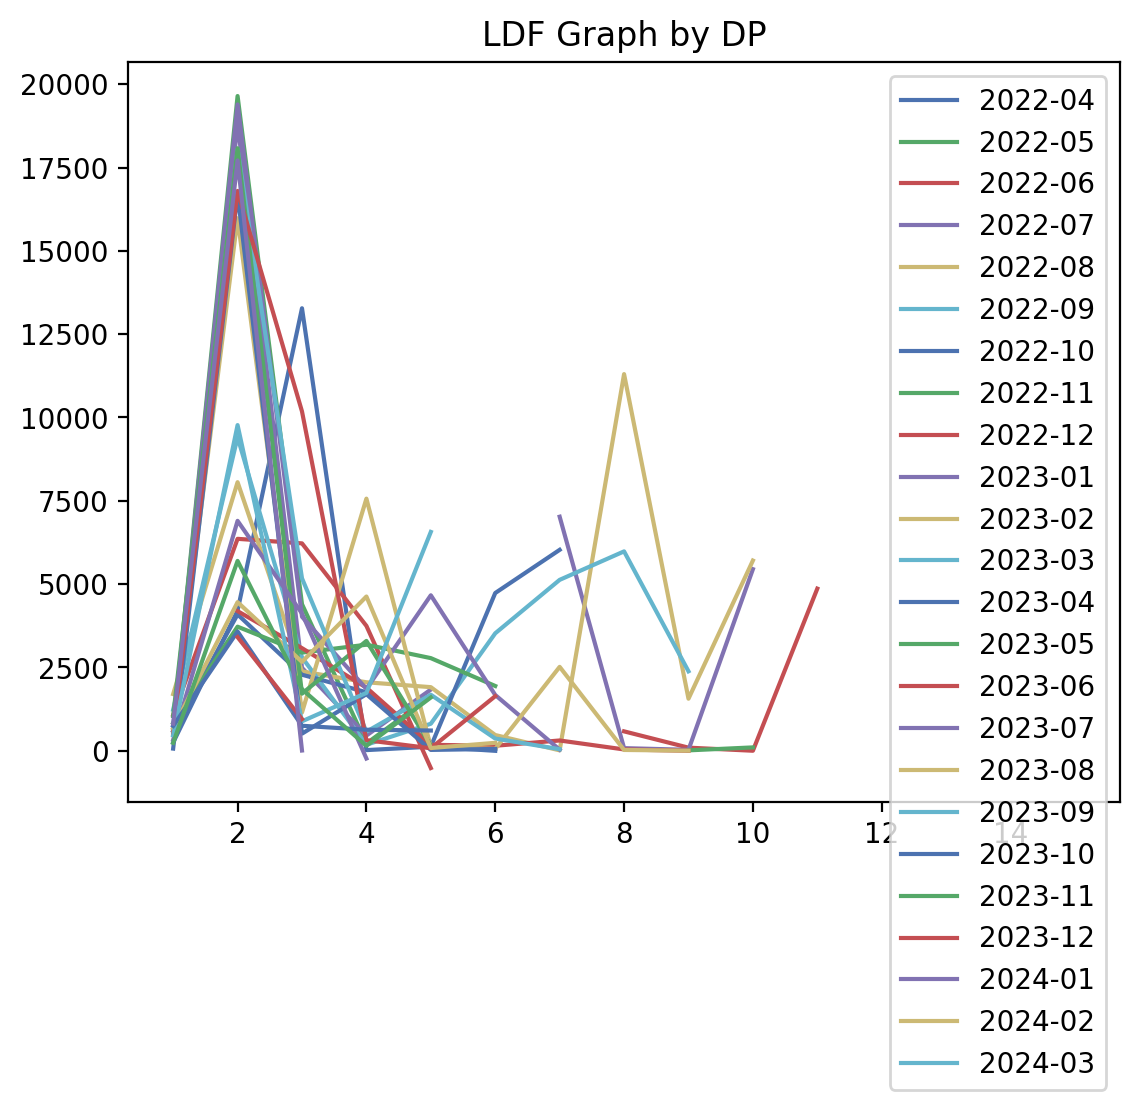

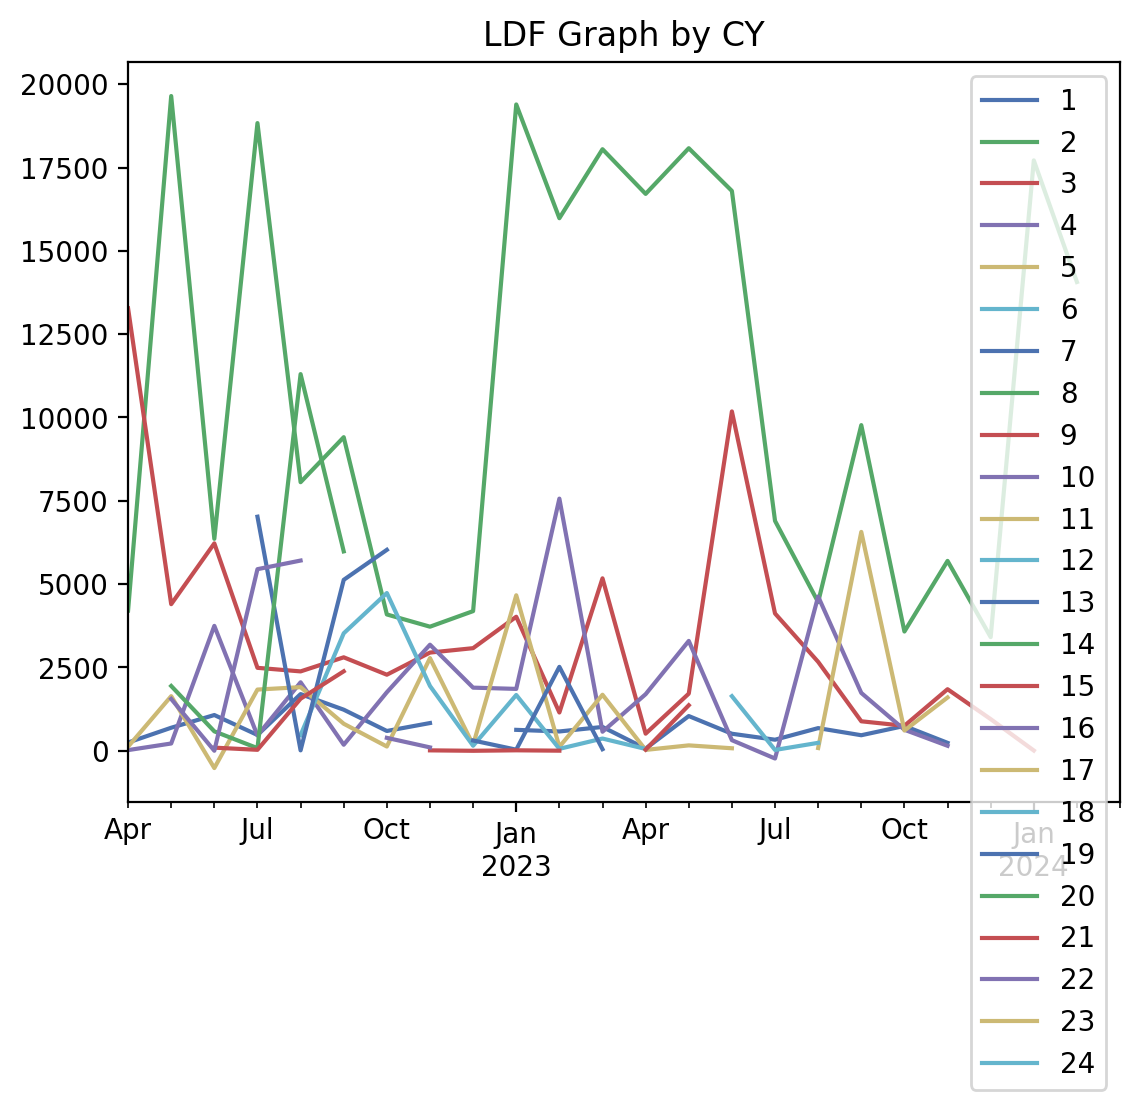

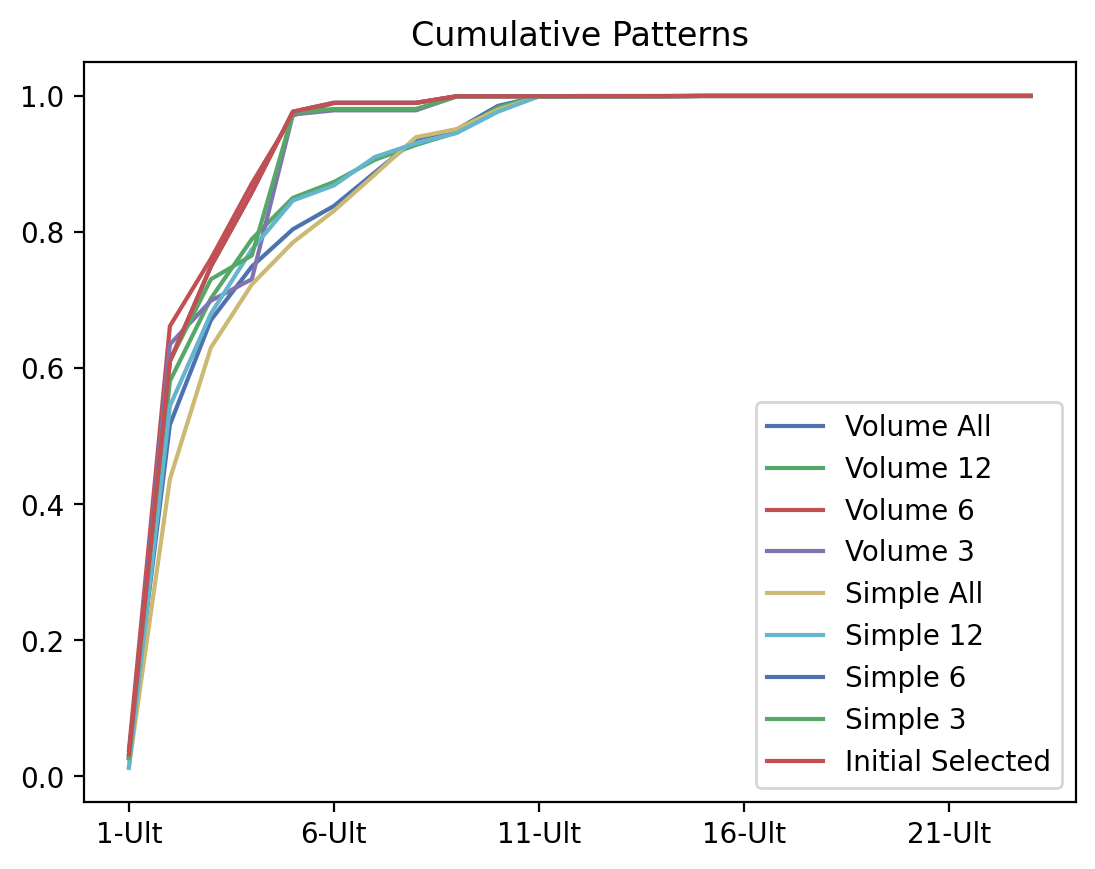

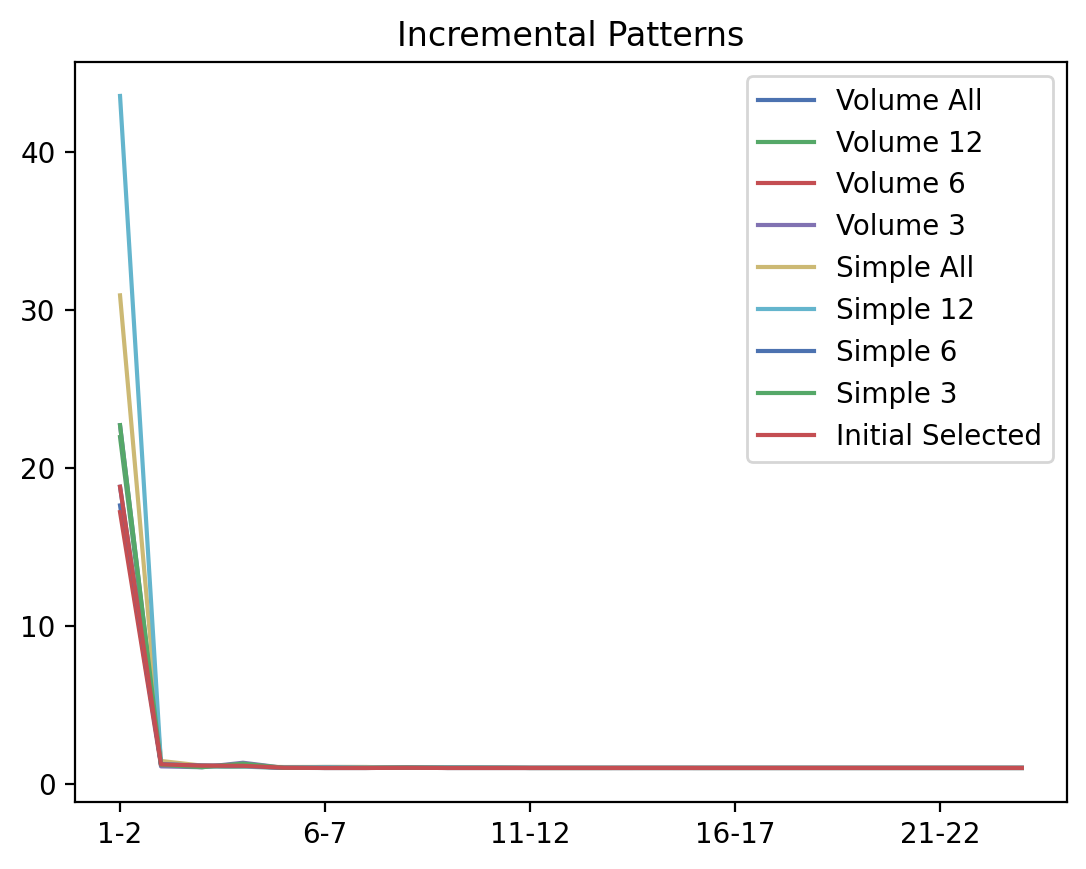

In [14]:
"""LDF Plots - Generic"""

triangle.T.plot(marker="",
title="LDF Graph by DP")

triangle.plot(marker="",
title="LDF Graph by CY")

"""Culative Patterns Plot"""
plotPatterns=pd.concat([(1/transformed_triangleVolumeAll.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume All'}),(1/transformed_triangleVolume12.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 12'}),(1/transformed_triangleVolume6.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 6'}),(1/transformed_triangleVolume3.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 3'}),(1/transformed_triangleSimpleAll.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple All'}), (1/transformed_triangleSimple12.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 12'}),(1/transformed_triangleSimple6.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 6'}),(1/transformed_triangleSimple3.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 3'}),(1/Transformed_triangleInitialSelected.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Initial Selected'})]).T.plot(marker="",title="Cumulative Patterns")

"""Incremental Patterns Plot"""
plotPatterns=pd.concat([(transformed_triangleVolumeAll.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume All'}),(transformed_triangleVolume12.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 12'}),(transformed_triangleVolume6.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 6'}),(transformed_triangleVolume3.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 3'}),(transformed_triangleSimpleAll.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple All'}),(transformed_triangleSimple12.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 12'}),(transformed_triangleSimple6.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 6'}),(transformed_triangleSimple3.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 3'}),(Transformed_triangleInitialSelected.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Initial Selected'})]).T.plot(marker="",title="Incremental Patterns")





In [15]:
"""Tail Curve - Generic""" #Still need to figure out why projection_period argument is not working for the exponential and inverse power fit

InputFuturePeriods=12

exponentialtailcurve = cl.TailCurve(curve='exponential',extrap_periods=InputFuturePeriods, attachment_age=1).fit(triangle_cum)
exponentialtailcurve_ldf=exponentialtailcurve.ldf_

inversepowertailcurve = cl.TailCurve(curve='inverse_power',extrap_periods=InputFuturePeriods, attachment_age=1).fit(triangle_cum)
inversepowertailcurve_ldf=inversepowertailcurve.ldf_

#Input for selected tail curve
SelectedCurve='exponential'

SelectedTailCurve=cl.TailCurve(curve=SelectedCurve,extrap_periods=InputFuturePeriods)





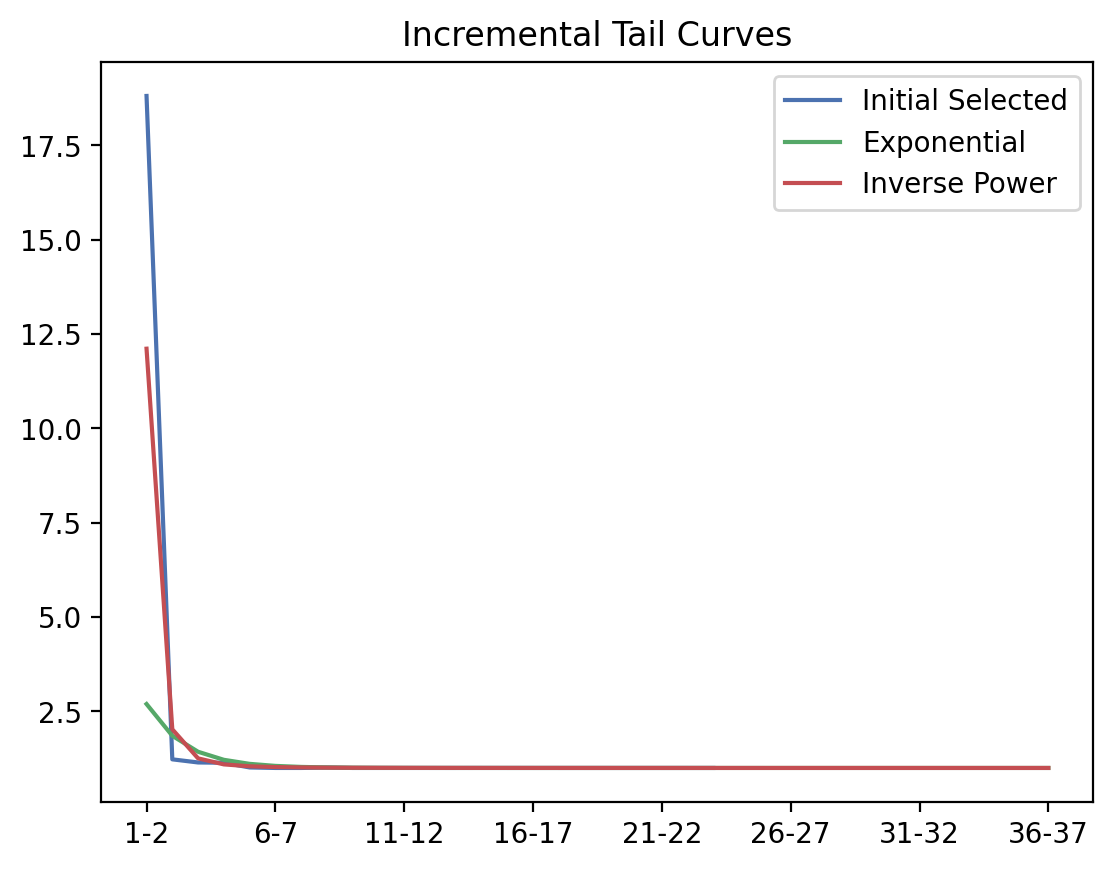

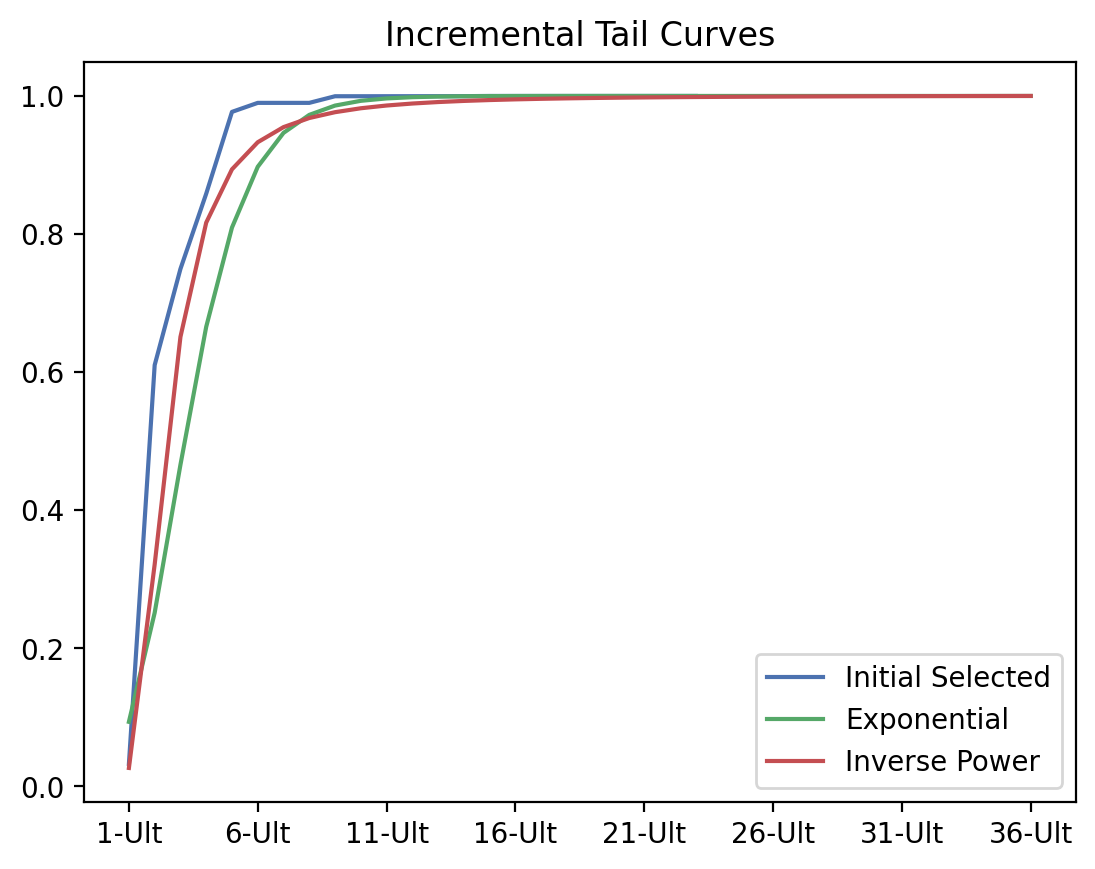

In [16]:
"""Tail Curves Plot"""

"""Incremental Tail Curves"""""
plotTailCurvess=pd.concat([ldfInitialSelected.to_frame(origin_as_datetima=False).rename({'(All)':'Initial Selected'}),(exponentialtailcurve.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Exponential'}),(inversepowertailcurve.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Inverse Power'})]).T.plot(marker="",title="Incremental Tail Curves")

"""Cumulative Tail Curves"""""
plotTailCurvess=pd.concat([(1/cdfInitialSelected).to_frame(origin_as_datetime=False).rename({'(All)':'Initial Selected'}),(1/exponentialtailcurve.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Exponential'}),(1/inversepowertailcurve.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Inverse Power'})]).T.plot(marker="",title="Incremental Tail Curves")

In [17]:
"""Tail Factor - Generic""" #Still need to figure out how to select between different calculated curves and tails


exponentialtail = cl.TailCurve(curve='exponential',extrap_periods=InputFuturePeriods).fit(triangle_cum).tail_
exponentialtail

inversepowertail = cl.TailCurve(curve='inverse_power',extrap_periods=InputFuturePeriods).fit(triangle_cum).tail_
inversepowertail

#Should find the way to pick the selected tail in here
SelectedTail=exponentialtail
SelectedTail

,24-Ult
(All),1.0


In [18]:
"""DFM Ultimate, Cumulative Factors and Incremental Factors"""

"""Generic"""""
FinalModel= cl.Pipeline([("dev", InitialSelected_LDF), ("tail", SelectedTailCurve)]).fit_transform(triangle_cum)
DFMUltimate=cl.Chainladder().fit(FinalModel).ultimate_
DFMUltimate

"""closed"""
#FinalModel_closed= cl.Pipeline([("dev", Average1_closed), ("tail", SelectedTailCurve) ]).fit_transform(triangle_closed)
#DFMUltimate_closed=cl.Chainladder().fit(FinalModel_closed).ultimate_

"""severity paid"""
#FinalModel_severitypaid= cl.Pipeline([("dev", Average1_severitypaid), ("tail", SelectedTailCurve) ]).fit_transform(triangle_severity_paid)
#DFMUltimate_severitypaid=cl.Chainladder().fit(FinalModel_severitypaid).ultimate_

DFMUltimate


,2261-12
2022-04,"17,902"
2022-05,"30,096"
2022-06,"22,434"
2022-07,"36,677"
2022-08,"35,169"
2022-09,"31,633"
2022-10,"20,010"
2022-11,"15,557"
2022-12,"9,851"
2023-01,"32,299"


In [19]:
"""UltimatePatterns"""

Paid_CumPattern= DFMUltimate/triangle_cum.latest_diagonal
#Closed_CumPattern= DFMUltimate_closed/triangle_closed.latest_diagonal


Paid_CumPattern

,2261-12
2022-04,1.0000
2022-05,1.0000
2022-06,1.0000
2022-07,1.0000
2022-08,1.0000
2022-09,1.0000
2022-10,1.0000
2022-11,1.0000
2022-12,1.0000
2023-01,1.0000


In [23]:
pf=pd.read_excel('Input Database_Unified.xlsx',sheet_name='Premium')

pf

,claim_occurrence_span_start,check_date,Annualized Premium,company_code,block_code,PLOB,LOB,State
0,2019-01-01,2024-03-01,52803.717500,NaN,NaN,NaN,NaN,NaN
1,2019-02-01,2024-03-01,51256.242500,NaN,NaN,NaN,NaN,NaN
2,2019-03-01,2024-03-01,49140.509167,NaN,NaN,NaN,NaN,NaN
3,2019-04-01,2024-03-01,48238.895833,NaN,NaN,NaN,NaN,NaN
4,2019-05-01,2024-03-01,47716.725833,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58,2023-11-01,2024-03-01,12565.323333,NaN,NaN,NaN,NaN,NaN
59,2023-12-01,2024-03-01,12122.973333,NaN,NaN,NaN,NaN,NaN
60,2024-01-01,2024-03-01,11200.785000,NaN,NaN,NaN,NaN,NaN
61,2024-02-01,2024-03-01,11200.785000,NaN,NaN,NaN,NaN,NaN


In [28]:
#Inputs in FrontEnd
InputOriginP='claim_occurrence_span_start'
InputDevelopmentP='check_date'
InputColumnsP='Annualized Premium'
InputCumulativeP=True
#InputCompanyP="company_code"
#InputBlockP="block_code"
#InputPLOBP="PLOB"
#InputLOBP="LOB"
#InputStateP="State"

wep = cl.Triangle(
    pf,
    origin=InputOriginP,
    development=InputDevelopmentP,
    columns=InputColumnsP,
    #index=[InputCompanyP,InputBlockP,InputPLOBP, InputLOBP, InputStateP],
    cumulative=InputCumulativeP
)
wep

,2024-03
2019-01,"52,804"
2019-02,"51,256"
2019-03,"49,141"
2019-04,"48,239"
2019-05,"47,717"
2019-06,"47,813"
2019-07,"46,336"
2019-08,"45,266"
2019-09,"43,668"
2019-10,"42,612"


In [29]:
"""bringing the exposure. One for each segment and gross/net. We can have also Exposure, Written premium, salary, as exposure measure"""

# """Earned Premium"""
# Type='Earned Premium'
# Segment='Motor'
# GrossNet='Gross'

# EarnedPremium= we.loc[Type, Segment, GrossNet]
# EarnedPremium

# """Exposure"""
# Type='Exposure'
# Segment='Motor'
# GrossNet='Gross'

# exposure= we.loc[Type, Segment, GrossNet]
#exposure

ValuationDate= datetime.date(2024,3,1)
InitialDate= f'{ValuationDate.year-2}-{ValuationDate.month}-{ValuationDate.day}'

EarnedPremium=wep[wep.origin>InitialDate]
EarnedPremiumm=EarnedPremium.incr_to_cum()
EarnedPremium

,2024-03
2022-04,"21,688"
2022-05,"20,617"
2022-06,"20,047"
2022-07,"19,696"
2022-08,"19,467"
2022-09,"19,277"
2022-10,"18,975"
2022-11,"18,635"
2022-12,"18,406"
2023-01,"17,768"


In [ ]:
"""calculating frequency"""

"""generic frequency triangle. Would be good to have it with each DFM as a visual"""
# TriangleFrequency= triangle_closed/exposure
# TriangleFrequency

# """Ultimate Loss Ratios for Expected Methods and BFs"""

# DFMfrequency_closed=DFMUltimate_closed/exposure.latest_diagonal


# DFMfrequency_closed_df= DFMfrequency_closed.to_frame()

# #Input for Final Selection. This shoulds be spaces to mannually select.
# FreqInput12=0.025
# FreqInput24=0.025
# FreqInput36=0.025
# FreqInput48=0.025
# FreqInput60=0.025
# FreqInput72=0.025
# FreqInput84=0.025
# FreqInput96=0.025
# FreqInput108=0.025
# FreqInput120=0.025

# SelectedFrequency=[FreqInput120, FreqInput108, FreqInput96, FreqInput84, FreqInput72, FreqInput60, FreqInput48, FreqInput36, FreqInput24, FreqInput12]

# SelectionFrequency_df = pd.concat([DFMfrequency_reported_df, DFMfrequency_closed_df], axis=1 )
# SelectionFrequency_df.columns = ['Reported Development Method', 'Closed Development Method']
# SelectionFrequency_df['Selected Initial Expected'] = SelectedFrequency
# SelectionFrequency_df


,Reported Development Method,Closed Development Method,Selected Initial Expected
2014-01-01,0.023336,0.004812,0.025
2015-01-01,0.023308,0.002780,0.025
2016-01-01,0.023337,0.002064,0.025
2017-01-01,0.023381,0.000439,0.025
2018-01-01,0.023466,0.002921,0.025
2019-01-01,0.023657,0.000971,0.025
2020-01-01,0.024607,0.000935,0.025
2021-01-01,0.026902,0.000392,0.025
2022-01-01,0.030478,0.000561,0.025
2023-01-01,0.052454,0.008639,0.025


In [ ]:
"""Expected Methods and BFs claim counts"""
# IEFreq_Triangle=SelectedFrequency*exposure
# IEFreq=IEFreq_Triangle.latest_diagonal

# """Expected Methods"""
# InitialExpectedFreqMethod=IEFreq

# """BF - Generic"""
# BF_Ultimate_Claims= cl.BornhuetterFerguson(apriori=1).fit(triangle,sample_weight=IEFreq).ultimate_
# BF_Ultimate_Claims

# """BF - Reported and Closed"""
# BF_Reported_Ultimate= cl.BornhuetterFerguson(apriori=1).fit(triangle_reported,sample_weight=IEFreq).ultimate_
# BF_Reported_Ultimate

# BF_Closed_Ultimate= cl.BornhuetterFerguson(apriori=1).fit(triangle_closed,sample_weight=IEFreq).ultimate_
# BF_Closed_Ultimate


,2261
2014,248
2015,"-1,152"
2016,"-2,433"
2017,"-4,754"
2018,"-3,845"
2019,"-8,553"
2020,"-9,395"
2021,"-8,886"
2022,"-3,795"
2023,-672


In [ ]:
"""Selection of Ultimate Claims Counts"""
# DFMUltimate_reported_df=DFMUltimate_reported.to_frame()
# DFMUtimate_closed_df=DFMUltimate_closed.to_frame()
# BF_Reported_df=BF_Reported_Ultimate.to_frame()
# BF_Closed_df=BF_Closed_Ultimate.to_frame()
# IEFreq_df=IEFreq.to_frame()

# #Mannual input for Final Selection. This shoulds be spaces to mannually select.
# UltFreqInput12=450
# UltFreqInput24=900
# UltFreqInput36=1738
# UltFreqInput48=1920
# UltFreqInput60=2147
# UltFreqInput72=1012
# UltFreqInput84=1706
# UltFreqInput96=1263
# UltFreqInput108=820
# UltFreqInput120=1418

# SelectedUltimateCounts=[UltFreqInput120, UltFreqInput108, UltFreqInput96, UltFreqInput84, UltFreqInput72, UltFreqInput60, UltFreqInput48, UltFreqInput36, UltFreqInput24, UltFreqInput12]

# SelectionClaimCount_df = pd.concat([DFMUltimate_reported_df, DFMUtimate_closed_df , BF_Reported_df, BF_Closed_df, IEFreq_df], axis=1 )
# SelectionClaimCount_df.columns = ['Reported Development Method', 'Closed Development Method', 'Reported BF Method', 'Closed BF Method', 'Initial Expected Method']
# SelectionClaimCount_df['Selected Ultimate Counts'] = SelectedUltimateCounts
# SelectionClaimCount_df

,Reported Development Method,Closed Development Method,Reported BF Method,Closed BF Method,Initial Expected Method,Selected Ultimate Counts
2014-01-01,1324.215702,273.036445,1324.000000,247.500000,1418.657143,1418
2015-01-01,764.124469,91.149629,764.000000,-1151.610470,819.592500,820
2016-01-01,1179.192079,104.302334,1179.000000,-2432.623104,1263.212143,1263
2017-01-01,1596.167948,29.970639,1596.179242,-4753.615006,1706.697857,1706
2018-01-01,949.996480,118.269710,950.224559,-3845.357085,1012.087500,1012
2019-01-01,2031.145073,83.376347,2032.340707,-8553.273225,2146.425000,2147
2020-01-01,1890.564685,71.819568,1891.827863,-9395.356230,1920.792857,1920
2021-01-01,1737.271462,25.332305,1720.765579,-8885.564401,1614.465000,1738
2022-01-01,805.191932,14.820392,771.107119,-3794.664737,660.478929,900
2023-01-01,417.059202,68.688967,297.679480,-672.150892,198.772500,450


In [ ]:
"""Calculatin Frequency/SeverityUltimate"""
# FreqSevUltimate=SelectionClaimCount_df['Selected Ultimate Counts'] *SelectionSeverity_df['Selected Ultimate Severity']
# FreqSevUltimate

2014-01-01    1559800
2015-01-01     902000
2016-01-01    1389300
2017-01-01    1876600
2018-01-01    1113200
2019-01-01    2361700
2020-01-01    2112000
2021-01-01    1911800
2022-01-01     990000
2023-01-01     495000
Freq: YS-JAN, dtype: int64

In [76]:
"""calculating Loss Ratios"""

"""generic loss ratio triangle. Would be good to have it with each DFM as a visual"""
TriangleLossRatio= triangle_cum/EarnedPremium
TriangleLossRatio

"""Ultimate Loss Ratios for Expected Methods and BFs"""
DFMLossRatio_Paid= DFMUltimate/EarnedPremium.latest_diagonal
#FreqSevLossRatio=FreqSevUltimate.to_frame()/EarnedPremium.latest_diagonal.to_frame().values


DFMLossRatio_Paid_df= DFMLossRatio_Paid.to_frame()
#FreqSevLossRatio_df=FreqSevLossRatio


#Input for Final Selection. This shoulds be spaces to mannually select.
LRInput1=0.7
LRInput2=0.7
LRInput3=0.7
LRInput4=0.7
LRInput5=0.7
LRInput6=0.7
LRInput7=0.7
LRInput8=0.7
LRInput9=0.7
LRInput10=0.7
LRInput11=0.7
LRInput12=0.7
LRInput13=0.7
LRInput14=0.7
LRInput15=0.7
LRInput16=0.7
LRInput17=0.7
LRInput18=0.7
LRInput19=0.7
LRInput20=0.7
LRInput21=0.7
LRInput22=0.7
LRInput23=0.7
LRInput24=0.7

SelectedLossRatio=[LRInput24, LRInput23, LRInput22, LRInput21, LRInput20, LRInput19, LRInput18, LRInput17, LRInput16, LRInput15, LRInput15, LRInput13, LRInput12, LRInput11, LRInput10, LRInput9, LRInput8
                   , LRInput7, LRInput6, LRInput5, LRInput4, LRInput3, LRInput2, LRInput1]

SelectionLossRatio_df = pd.concat([DFMLossRatio_Paid_df], axis=1)
SelectionLossRatio_df.columns = ['Paid Development Method']
SelectionLossRatio_df['Selected Initial Expected'] = SelectedLossRatio
SelectionLossRatio_df





,Paid Development Method,Selected Initial Expected
2022-04-01,0.825436,0.7
2022-05-01,1.459722,0.7
2022-06-01,1.119077,0.7
2022-07-01,1.862159,0.7
2022-08-01,1.806598,0.7
2022-09-01,1.640995,0.7
2022-10-01,1.054555,0.7
2022-11-01,0.834814,0.7
2022-12-01,0.535230,0.7
2023-01-01,1.817837,0.7


In [ ]:
"""calculating Burning Cost"""

"""generic burnin cost triangle. Would be good to have it with each DFM as a visual"""
# TriangleBC= triangle_cum/exposure
# TriangleBC

# """Ultimate bc for Expected Methods and BFs"""
# DFMBC_Paid= DFMUltimate/exposure.latest_diagonal
# #FreqSevBC=FreqSevUltimate.to_frame()/exposure.latest_diagonal.to_frame().values

# DFMBC_Paid_df= DFMBC_Paid.to_frame()
# #FreqSevBC_df=FreqSevBC

# #Input for Final Selection. This shoulds be spaces to mannually select.
# BCInput1=25
# BCInput2=25
# BCInput3=25
# BCInput4=25
# BCInput5=25
# BCInput6=25
# BCInput7=25
# BCInput8=25
# BCInput9=25
# BCInput10=25
# BCInput11=25
# BCInput12=25
# BCInput13=25
# BCInput14=25
# BCInput15=25
# BCInput16=25
# BCInput17=25
# BCInput18=25
# BCInput19=25
# BCInput20=25
# BCInput21=25
# BCInput22=25
# BCInput23=25
# BCInput24=25

# SelectedBC=[BCInput24, BCInput23, BCInput22, BCInput21, BCInput20, BCInput19, BCInput18, BCInput17, BCInput16, BCInput15, BCInput14, BCInput13, BCInput12, BCInput11, BCInput10, BCInput9, BCInput8
#             , BCInput7, BCInput6, BCInput5, BCInput4, BCInput3, BCInput2, BCInput1]

# SelectionBurningCost_df = pd.concat([DFMBC_Paid_df], axis=1 )
# SelectionBurningCost_df.columns = ['Paid Development Method']
# SelectionBurningCost_df['Selected Initial Expected'] = SelectedBC
# SelectionBurningCost_df

,Incurred Development Method,Paid Development Method,Case Reserve Method,Frequency Severity Method,Selected Initial Expected
2014-01-01,33.339374,23.337562,2.333333e+01,27.487262,25
2015-01-01,33.339374,23.337562,2.333333e+01,27.513673,25
2016-01-01,33.339374,23.337562,2.333333e+01,27.495382,25
2017-01-01,33.429679,23.400775,-1.297949e+14,27.488755,25
2018-01-01,33.554516,23.488161,2.333333e+01,27.497622,25
2019-01-01,33.808170,23.665719,2.333333e+01,27.507367,25
2020-01-01,35.167588,24.617311,2.333333e+01,27.488649,25
2021-01-01,38.441858,26.909301,1.196964e+16,29.604234,25
2022-01-01,43.585847,30.510093,2.118725e+16,37.472808,25
2023-01-01,73.601324,52.631764,9.360015e+16,62.257103,25


In [79]:

IELR_Triangle=SelectedLossRatio*EarnedPremium
IELR=IELR_Triangle

"""Expected Methods"""
InitialExpectedMethod=IELR

"""BF - Generic"""
BF_Ultimate= cl.BornhuetterFerguson(apriori=1).fit(triangle_cum,sample_weight=IELR).ultimate_
BF_Ultimate

IELR



ValueError: Shape of passed values is (24, 24), indices imply (24, 1)

ValueError: Shape of passed values is (24, 24), indices imply (24, 1)

In [34]:
"""Ultimate Selection"""
DFMUltimate_Paid_df=DFMUltimate.to_frame()
#FreqSevUltimate_df=FreqSevUltimate.to_frame()
InitialExpectedMethod_df= InitialExpectedMethod.to_frame()
BF_Ultimate_df=BF_Ultimate.to_frame()


#Input for Final Selection. This shoulds be spaces to mannually select.
UltInput1=190000
UltInput2=650000
UltInput3=1550000
UltInput4=1800000
UltInput5=2000000
UltInput6=95000
UltInput7=1600000
UltInput8=1200000
UltInput9=770000
UltInput10=1325000
UltInput11=1325000
UltInput12=1325000
UltInput13=1325000
UltInput14=1325000
UltInput15=1325000
UltInput16=1325000
UltInput17=1325000
UltInput18=1325000
UltInput19=1325000
UltInput20=1325000
UltInput21=1325000
UltInput22=1325000
UltInput23=1325000
UltInput24=132500024

SelectedUltimate=[UltInput24, UltInput23, UltInput22, UltInput21, UltInput20, UltInput19, UltInput18, UltInput17, UltInput16, UltInput15, UltInput14, UltInput13, UltInput12, UltInput11, UltInput10
                  ,UltInput9, UltInput8, UltInput7, UltInput6, UltInput5, UltInput4, UltInput3, UltInput2, UltInput1]

SelectionUltimate_df = pd.concat([DFMUltimate_Paid_df,InitialExpectedMethod_df, BF_Ultimate_df], axis=1 )
SelectionUltimate_df.columns = ['Paid Development Method','Frequency Severity Method', 'Intial Expected Methhod', 'BF Paid Method']
SelectionUltimate_df['Selected Ultimate Amounts'] = SelectedUltimate
SelectionUltimate_df

ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [ ]:
"""Diagnostics triangles"""
"""Loss"""

#PaidtoClosed= triangle_paid/triangle_closed
PaidtoEarnedPrmeium=triangle_cum/EarnedPremium
PaidtoExposure=triangle_cum/exposure

"""Claim Counts"""
#ClosedPerExposure=triangle_closed/exposure
